In [33]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import time
# ganache_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
#ganache_url="https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c/"
ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [34]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [54]:
abi = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" }, { "name": "a", "type": "uint256" }, { "name": "b", "type": "uint256" } ], "name": "sigmoid_act", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "x", "type": "int256" }, { "name": "y", "type": "int256" } ], "name": "div", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "sigprint", "outputs": [ { "name": "", "type": "uint256" }, { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')

cont_address = "0xE5DDeDF2cEF5945Ca7aa1C6CEb014E7184ff0776"

In [55]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [56]:
#grit
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"


In [57]:
# account1 = "0x2C0c1D0dA7c537ad49b6AD3cdF0ed6db462446E9"
# private_key1="d2b80a53fd2b1a30ecbe14517a65c07858679034061f2d0d5f768518ed46a1b6"
# account2 = "0x76b717F8b07365060131752EE08242C268CFd37B"
# private_key2="a3e852bd651cf3aa5f6d863e0727519140431ae912588b351ab5f7ee02e06cac"

In [58]:
nonce = web3.eth.getTransactionCount(account1)

In [59]:
def sigfrac(x,y,a,b):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sigmoid_act(
        x,y,a,b
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=1000)
    return tx_receipt.gasUsed

In [60]:
n, d = contract.functions.sigprint().call()
print("value of sigmoid is:", n/d)

ZeroDivisionError: division by zero

In [61]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [62]:
a_list = list(range(-50, 51))
a_val_num = np.array(a_list)
a_val_den = np.full(101,10)

In [63]:
print(a_val_num/a_val_den)

[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9  5. ]


In [64]:
sig_b=np.zeros(101)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [65]:
sig_e=np.zeros(101)
gasUse =[]
for i in range(len(a_val_num)):
#     time.sleep(10)
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [66]:
# sig_b

In [67]:
# sig_e

In [68]:
d = np.arange(-5.0, 5.1, 0.1)
# d

In [69]:
print(sig_e)

[0.00674193 0.00745218 0.00822186 0.00907308 0.01001386 0.01105295
 0.01219988 0.01346507 0.01485997 0.01639714 0.01809044 0.0199722
 0.02200631 0.02424974 0.02672176 0.02944299 0.0324356  0.03572345
 0.03933223 0.04328968 0.04762566 0.05241565 0.05755995 0.06319371
 0.06935349 0.0760768  0.08340202 0.09136825 0.10001523 0.10938314
 0.1195122  0.13054121 0.14220243 0.15476027 0.16824254 0.18267074
 0.1980594  0.21441538 0.23173743 0.25001566 0.26923077 0.28953302
 0.31032771 0.33198648 0.35443397 0.37758112 0.40132705 0.42556134
 0.45016656 0.47502083 0.47502083 0.52497916 0.54983322 0.57443616
 0.598659   0.62236629 0.64541113 0.66762917 0.68883174 0.70879885
 0.73076923 0.74998433 0.76826241 0.7855829  0.80193139 0.81729584
 0.83166271 0.84501295 0.85731819 0.86853718 0.8804878  0.89061686
 0.89998469 0.9086309  0.91659354 0.92390747 0.93060281 0.93670365
 0.94222679 0.9471808  0.95237434 0.95671032 0.96066773 0.96427619
 0.96756257 0.97055062 0.97326063 0.97570923 0.97790907 0.97986

In [70]:
print(sig_b)

[0.00669285 0.00739154 0.00816257 0.0090133  0.0099518  0.01098694
 0.01212843 0.01338692 0.01477403 0.0163025  0.01798621 0.01984031
 0.02188127 0.02412702 0.02659699 0.02931223 0.03229546 0.03557119
 0.03916572 0.04310725 0.04742587 0.05215356 0.05732418 0.06297336
 0.06913842 0.07585818 0.0831727  0.09112296 0.09975049 0.10909682
 0.11920292 0.13010847 0.14185106 0.15446527 0.16798161 0.18242552
 0.19781611 0.21416502 0.23147522 0.24973989 0.26894142 0.2890505
 0.31002552 0.33181223 0.35434369 0.37754067 0.40131234 0.42555748
 0.450166   0.47502081 0.5        0.52497919 0.549834   0.57444252
 0.59868766 0.62245933 0.64565631 0.66818777 0.68997448 0.7109495
 0.73105858 0.75026011 0.76852478 0.78583498 0.80218389 0.81757448
 0.83201839 0.84553473 0.85814894 0.86989153 0.88079708 0.89090318
 0.90024951 0.90887704 0.9168273  0.92414182 0.93086158 0.93702664
 0.94267582 0.94784644 0.95257413 0.95689275 0.96083428 0.96442881
 0.96770454 0.97068777 0.97340301 0.97587298 0.97811873 0.980159

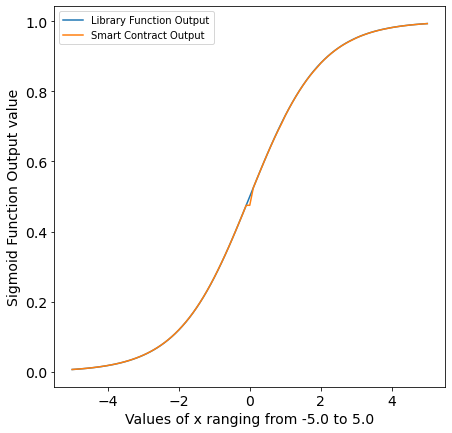

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(d, sig_b, label = "Library Function Output")
plt.plot(d, sig_e, label = "Smart Contract Output")
plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
plt.ylabel("Sigmoid Function Output value", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
plt.savefig("sigmoid_output.pdf", bbox_inches='tight')
plt.show()

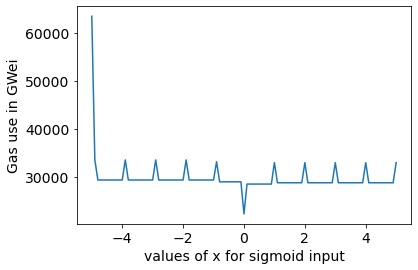

In [72]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
# plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei",fontsize=14)
plt.xlabel("values of x for sigmoid input",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig("sigmoid_gas.pdf", bbox_inches='tight')
plt.show()

